# <center><u>The Spark Foundation - GRIP</u></center>

## Topic: Prediction using Supervised ML

### Task 1 : Predict the percentage of an student based on the no. of study hours.

### Code Written By - Chinmay Kolvankar

This is a linear regression problem in which we are going to predict the percentage of students with the help of their study hours. This is a simple linear regression task as it involves just 2 variables.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 

print("Library files are imported successfully")

Library files are imported successfully


### Reading the data from given link

In [19]:
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Data provided given below

In [29]:
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Lets analyse the given data

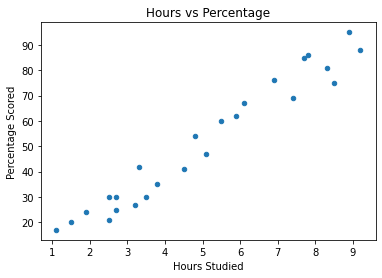

In [30]:
#Analysing data using Scatter Plot

stu_data.plot(x='Hours', y='Scores', kind='scatter')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

From the given graph, we can see that their is relation between stdied hours and percentage scored

### Data preparation

In [31]:
x = np.asanyarray(stu_data[['Hours']])
y = np.asanyarray(stu_data['Scores'])


Now split the dataset into training and testing set. we will use a built in function train_test_split()method: of scikit learn library

In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the model

In [32]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(train_x,train_y)
print("Training Completed\n")
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)


Training Completed

Coefficient :  [9.91065648]
Intercept :  2.018160041434662


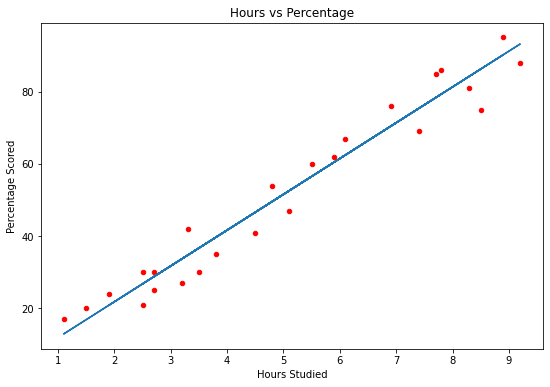

In [33]:
#Plotting the fit line on the scatter plot of test data

fitline = regressor.coef_[0]*train_x + regressor.intercept_

stu_data.plot(x='Hours', y='Scores', kind='scatter',figsize=(9,6),color='r')

plt.plot(train_x,fitline)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

The Blue line obtained in graph is the best fit line our data

#### Checking the accuracy

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred  = regressor.predict(test_x)
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_pred,test_y))
print("R2 Score : %2f"% r2_score(test_y,y_pred))
r= r2_score(test_y,y_pred)

Mean Absolute Error :  4.183859899002982
R2 Score : 0.945491


*Mean squared error* :- 
                      It tells how close a regression line is to a set of points. It does this by taking the distances from    the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.
            
*R-2 Score* :-
             It tells how close the data are to the fitted regression line. Range is between (0,1).Ideal value is 1.

In [35]:
#Compare Actual and Predicted data

df = pd.DataFrame({'Actual': test_y,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 

In [36]:
#Now predict the score of student by the value provided

hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f"Number of Hours : {hours}")
print(f"Predicted Score : {predicted_score[0]}")

print("\nR2 Score is ",r)

Number of Hours : 9.25
Predicted Score : 93.69173248737539

R2 Score is  0.9454906892105354
